In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdfkit
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [35]:
data = pd.read_csv('malaysia_parcel_volumes_2.csv')

In [36]:
X = data.index.values.reshape(-1,1)
y = data['Parcel Volume']

In [37]:
#ARIMA model
arima_model = ARIMA(y, order=(2,0,0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=1, end=len(y),typ='levels')

C:\Users\admin\anaconda3.1\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [38]:
#Polynominal model
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly,y)

poly_predictions = poly_model.predict(X_poly)

In [39]:
#Random Forest
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X,y)

rf_predictions = rf_model.predict(X)

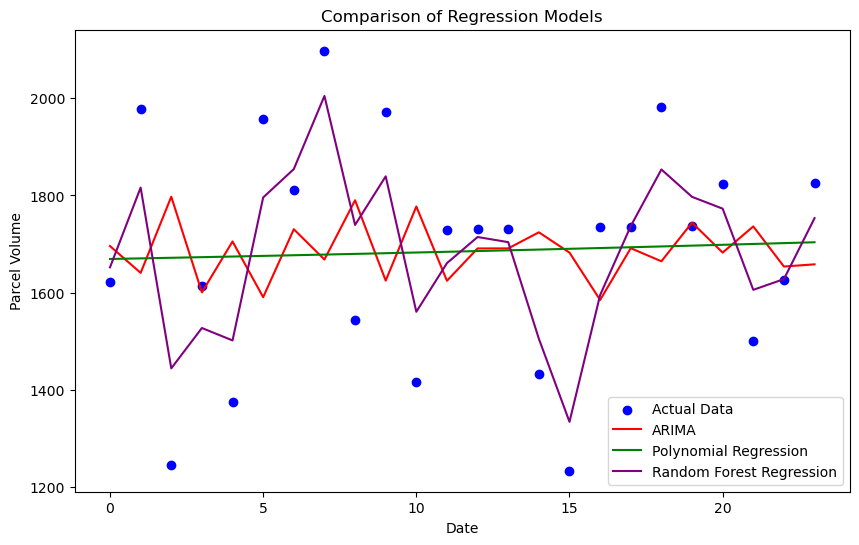

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,color='blue',label='Actual Data')
plt.plot(X,arima_predictions, color='red',label='ARIMA')
plt.plot(X, poly_predictions, color='green',label='Polynomial Regression')
plt.plot(X, rf_predictions, color='purple', label='Random Forest Regression')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()

In [41]:
#Calculate evaluation metrics
arima_mse = mean_squared_error(y, arima_predictions)
arima_mae = mean_absolute_error(y, arima_predictions)

poly_mse = mean_squared_error(y, poly_predictions)
poly_mae = mean_absolute_error(y, poly_predictions)

rf_mse = mean_squared_error(y, rf_predictions)
rf_mae = mean_absolute_error(y, rf_predictions)

In [42]:
#Print evaluation metrics

print("Arima Model:")
print("MSE:",arima_mse)
print("MAE:",arima_mae)

print("\nPolynomial Regression:")
print("MSE:",poly_mse)
print("MAE:",poly_mae)

print("\nRandom Forest Regression:")
print("MSE:",rf_mse)
print("MAE:",rf_mae)

Arima Model:
MSE: 71000.28888487934
MAE: 214.94555840099397

Polynomial Regression:
MSE: 52735.54559085841
MAE: 185.65523411371237

Random Forest Regression:
MSE: 11812.243799999997
MAE: 92.53416666666665
